In [1]:
!mkdir -p /data/sets/nuscenes  # Make the directory to store the nuScenes dataset in.

!wget https://www.nuscenes.org/data/v1.0-mini.tgz  # Download the nuScenes mini split.

!tar -xf v1.0-mini.tgz -C /data/sets/nuscenes  # Uncompress the nuScenes mini split.

!pip install nuscenes-devkit &> /dev/null  # Install nuScenes.

--2022-12-08 03:03:40--  https://www.nuscenes.org/data/v1.0-mini.tgz
Resolving www.nuscenes.org (www.nuscenes.org)... 13.249.85.99, 13.249.85.108, 13.249.85.65, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|13.249.85.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4167696325 (3.9G) [application/x-tar]
Saving to: ‘v1.0-mini.tgz’

v1.0-mini.tgz       100%[===================>]   3.88G  31.1MB/s    in 1m 48s  

2022-12-08 03:05:29 (36.8 MB/s) - ‘v1.0-mini.tgz’ saved [4167696325/4167696325]



In [2]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='/data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.662 seconds.
Reverse indexing ...
Done reverse indexing in 0.2 seconds.


In [21]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
schema1=StructType([StructField('token',StringType(),True),StructField('log_token',StringType(),True),StructField('nbr_samples',StringType(),True),StructField('first_sample_token',StringType(),True),StructField('last_sample_token',StringType(),True),StructField('name',StringType(),True),StructField('description',StringType(),True)])

In [11]:
!pip install -q findspark
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.3-bin-hadoop3.2'

In [12]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Nuscenes1")\
        .getOrCreate()

            ********Storing the data into csv files *********************

Scene

In [33]:
list_scenes=list(nusc.scene)
field_names= [i for i in list_scenes[0].keys()]
import csv
for i in range(0,1):
  with open('scenes/scenes'+str(i+1)+'.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=field_names)
      writer.writeheader()
      writer.writerows(list_scenes)

sample

In [ ]:
sample_lst=[]
for i in nusc.sample:
  sample_lst.append(i)
sample_lst[0]

In [14]:
field_names_sample= [i for i in sample_lst[0].keys()]
#field_names_sample
len(sample_lst)

404

In [15]:
import csv
for i in range(0,1):
  with open('samples/sample'+str(i+1)+'.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=field_names_sample)
      writer.writeheader()
      if (i==3):
        writer.writerows(sample_lst[300:404])
      else:
        writer.writerows(sample_lst)

sample_data

In [16]:
sample_data_lst=[]
for i in nusc.sample_data:
  sample_data_lst.append(i)
sample_data_lst[0]

{'token': '5ace90b379af485b9dcb1584b01e7212',
 'sample_token': '39586f9d59004284a7114a68825e8eec',
 'ego_pose_token': '5ace90b379af485b9dcb1584b01e7212',
 'calibrated_sensor_token': 'f4d2a6c281f34a7eb8bb033d82321f79',
 'timestamp': 1532402927814384,
 'fileformat': 'pcd',
 'is_key_frame': False,
 'height': 0,
 'width': 0,
 'filename': 'sweeps/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__1532402927814384.pcd',
 'prev': 'f0b8593e08594a3eb1152c138b312813',
 'next': '978db2bcdf584b799c13594a348576d2',
 'sensor_modality': 'radar',
 'channel': 'RADAR_FRONT'}

In [17]:
field_names_sample_data= [i for i in sample_data_lst[0].keys()]
#field_names_sample


In [18]:
for i in range(0,1):
  with open('sample_data1/sample_data'+str(i+1)+'.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=field_names_sample_data)
      writer.writeheader()
    
      writer.writerows(sample_data_lst)

sample_annotation

In [19]:
sample_annotation_lst=[]
for i in nusc.sample_annotation:
  sample_annotation_lst.append(i)
sample_annotation_lst[0]

{'token': '70aecbe9b64f4722ab3c230391a3beb8',
 'sample_token': 'cd21dbfc3bd749c7b10a5c42562e0c42',
 'instance_token': '6dd2cbf4c24b4caeb625035869bca7b5',
 'visibility_token': '4',
 'attribute_tokens': ['4d8821270b4a47e3a8a300cbec48188e'],
 'translation': [373.214, 1130.48, 1.25],
 'size': [0.621, 0.669, 1.642],
 'rotation': [0.9831098797903927, 0.0, 0.0, -0.18301629506281616],
 'prev': 'a1721876c0944cdd92ebc3c75d55d693',
 'next': '1e8e35d365a441a18dd5503a0ee1c208',
 'num_lidar_pts': 5,
 'num_radar_pts': 0,
 'category_name': 'human.pedestrian.adult'}

In [20]:
field_names_sample_annotation= [i for i in sample_annotation_lst[0].keys()]

In [22]:
for i in range(0,1):
  with open('sample_annotation/sample_annotation'+str(i+1)+'.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=field_names_sample_annotation)
      writer.writeheader()
    
      writer.writerows(sample_annotation_lst)

instance

In [23]:
instance=[]
for i in nusc.instance:
  instance.append(i)
len(instance)

911

In [24]:
field_names_instance= [i for i in instance[0].keys()]

In [25]:
for i in range(0,1):
  with open('instance/instance'+str(i+1)+'.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=field_names_instance)
      writer.writeheader()
    
      writer.writerows(instance)

category

In [26]:
category=[]
for i in nusc.category:
  category.append(i)
len(category)

23

In [27]:
field_names_category=[i for i in category[0].keys()]

In [28]:
with open('category/category'+str(1)+'.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=field_names_category)
      writer.writeheader()
    
      writer.writerows(category)

attribute

In [29]:
attribute=[]
for i in nusc.attribute:
  attribute.append(i)
len(attribute)

8

In [30]:
field_names_attribute=[i for i in attribute[0].keys()]

In [31]:
with open('attribute/attribute'+str(1)+'.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=field_names_attribute)
      writer.writeheader()
    
      writer.writerows(attribute)

Visibility

In [32]:
visibility=[]
for i in nusc.visibility:
  visibility.append(i)
len(visibility)

4

In [33]:
field_names_visibility=[i for i in visibility[0].keys()]

In [34]:
with open('visibility/visibility'+str(1)+'.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=field_names_visibility)
      writer.writeheader()
    
      writer.writerows(visibility)

sensor

In [73]:
sensor=[]
for i in nusc.sensor:
  sensor.append(i)
len(sensor)

12

In [74]:
field_names_sensor=[i for i in sensor[0].keys()]
with open('sensor/sensor'+str(1)+'.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=field_names_sensor)
      writer.writeheader()
    
      writer.writerows(sensor)


calibrated_sensor

In [76]:
c_sensor=[]
for i in nusc.calibrated_sensor:
   c_sensor.append(i)
len(c_sensor)

120

In [77]:
field_names_c_sensor=[i for i in c_sensor[0].keys()]
with open('c_sensor/c_sensor'+str(1)+'.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=field_names_c_sensor)
      writer.writeheader()
    
      writer.writerows(c_sensor)

ego_pose

In [78]:
ego_pose=[]
for i in nusc.ego_pose:
  ego_pose.append(i)
len(ego_pose)

31206

In [79]:
field_names_ego_pose=[i for i in ego_pose[0].keys()]
with open('ego_pose/ego_pose'+str(1)+'.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=field_names_ego_pose)
      writer.writeheader()
    
      writer.writerows(ego_pose)

log

In [80]:
log=[]
for i in nusc.log:
  log.append(i)
len(log)

8

In [81]:
field_names_log=[i for i in log[0].keys()]
with open('log/log'+str(1)+'.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=field_names_log)
      writer.writeheader()
    
      writer.writerows(log)

Map

In [82]:
map=[]
for i in nusc.map:
  map.append(i)
len(map)

4

In [83]:
field_names_map=[i for i in map[0].keys()]
with open('map/map'+str(1)+'.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=field_names_map)
      writer.writeheader()
    
      writer.writerows(map)

        ***************Queries uisng pyspark *********************

Query1 : - image you got from sensor in a particular sample

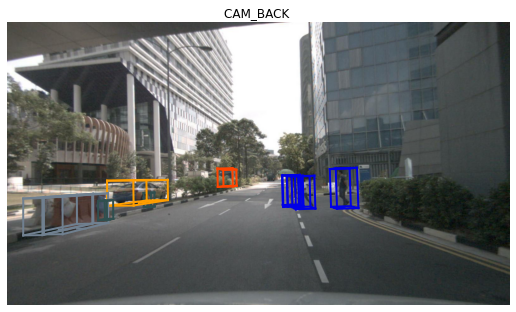

In [82]:
sample1=nusc.sample[0]
query1=spark.read.csv('samples/sample1.csv', sep=',',
                         inferSchema=True, header=True)
query1_2=query1.select('token','data').where(query1.token==sample1["token"])
answer=[data1[0] for data1 in query1_2.select('data').collect()]
cam="CAM_BACK"
answer=(eval(answer[0]))
nusc.render_sample_data(answer[cam])

Query2 : -print the token,first_sample_token into a csv file.

In [ ]:
scene=spark.readStream.format("csv").schema(schema1).option("header",True).option("maxFilesPerTrigger",1).load("scenes")
query2=scene.select('token','first_sample_token')
q=query2.writeStream.format("csv").option("path","/query1").option ("checkpointLocation", "/checkpoint_path").outputMode("append").start()

Query3 - Given sample annotation tokens,return what kind of category they belong to.

In [96]:
sample_ann1=nusc.sample_annotation[0]
sample_ann2=nusc.sample_annotation[60]
query3=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)
answer1=query3.select('category_name').where(query3.token == sample_ann1['token'])
answer2=query3.select('category_name').where(query3.token == sample_ann2['token'])
result1=[data[0] for data in answer1.select('category_name').collect()]
result2=[data[0] for data in answer2.select('category_name').collect()]
print(result1)
print(result2)

['human.pedestrian.adult']
['human.pedestrian.adult']


Query4 - given a sample token return data from sensor LIDAR_TOP

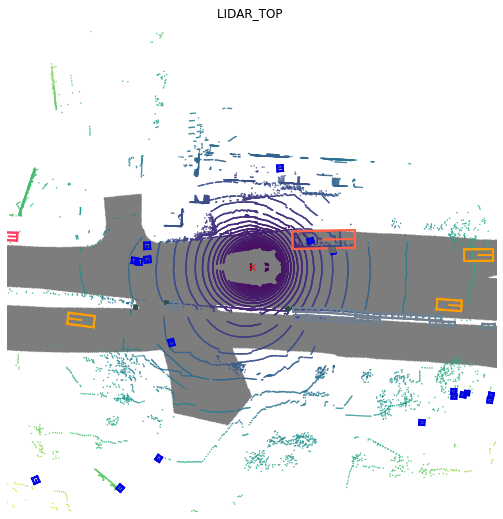

In [100]:
sample1=nusc.sample[1]
query4=spark.read.csv('samples/sample1.csv', sep=',',
                         inferSchema=True, header=True)
query4_2=query2.select('token','data').where(query4.token==sample1["token"])
answer=[data1[0] for data1 in query4_2.select('data').collect()]
cam="LIDAR_TOP"
answer=(eval(answer[0]))
nusc.render_sample_data(answer[cam])

Query5 -Return number of sample_annotations whose category is vehicle.

In [ ]:
query5=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)
result1=[data[0] for data in query5.select('category_name').collect()]
answer=0
for i in result1:
  result2=i.split('.')
  if (result2[0]=="vehicle"):
     answer=answer+1
answer


Query6 : - Return number of sample_annotations whose category is pedestrain.

In [ ]:

query6=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)
result1=[data[0] for data in query6.select('category_name').collect()]
answer=0
for i in result1:
  result2=i.split('.')
  if (result2[1]=="pedestrian"):
     answer=answer+1
answer

Query7 - Given an sample_annotation,calculate number of instances of that annotation

In [38]:
query7=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)
sample_ann=nusc.sample_annotation[20]
query7=query7.select('instance_token').where(query7.token ==  sample_ann['token'])
result1=[data[0] for data in query7.select('instance_token').collect()]
query7=spark.read.csv('instance/instance1.csv', sep=',',
                         inferSchema=True, header=True)
query7=query7.select('nbr_annotations').where(query7.token == result1[0]);
result2=[data[0] for data in query7.select('nbr_annotations').collect()]
result2[0]

39

Query8 - Given a sample annotation,return the third instance of that annotation

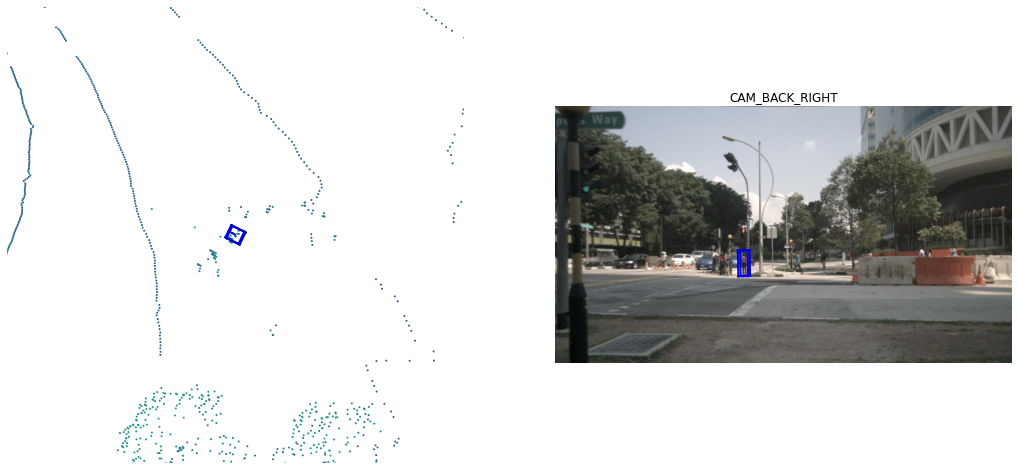

In [42]:
query8=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)
sample_ann=nusc.sample_annotation[20]
curr_ann=sample_ann['token']
next_ann=sample_ann['next']
i=2
while(i!=0):
  query8.select('next').where(query8.token == curr_ann)
  result1=[data[0] for data in query8.select('next').collect()]
  curr_ann=result1[0]
  i=i-1
nusc.render_annotation(curr_ann)

Query9-Given a sample,number of annotations in that sample

In [47]:
query9=spark.read.csv('samples/sample1.csv', sep=',',
                         inferSchema=True, header=True)
sample=nusc.sample[15]
query9=query9.select('anns').where(query9.token == sample['token'])
result1=[data[0] for data in query9.select('anns').collect()]
answer=eval(result1[0])
len(answer)

143

Query10-Given a sample_annotation,return last instance

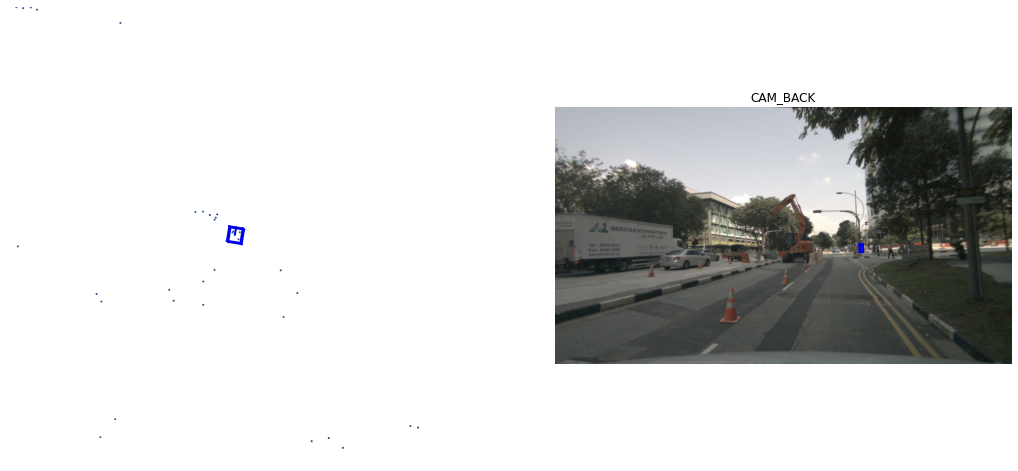

In [51]:
query10=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)
sample_ann=nusc.sample_annotation[20]
query10=query10.select('instance_token').where(query10.token == sample_ann['token'])
result1=[data[0] for data in query10.select('instance_token').collect()]
query10=spark.read.csv('instance/instance1.csv', sep=',',
                         inferSchema=True, header=True)
query10=query10.select("last_annotation_token").where(query10.token == result1[0])
result1=[data[0] for data in query10.select('last_annotation_token').collect()]
nusc.render_annotation(result1[0])

Query11-Given a sample annotation,list all activities that annotation has done 

In [55]:
query11=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)
sample_ann=nusc.sample_annotation[9]
query11=query11.select('instance_token').where(query11.token == sample_ann['token'])
result1=[data[0] for data in query11.select('instance_token').collect()]
query11=spark.read.csv('instance/instance1.csv', sep=',',
                         inferSchema=True, header=True)
query11=query11.select('category_token').where(query11.token == result1[0])
result1=[data[0] for data in query11.select('category_token').collect()]
query11=spark.read.csv('category/category1.csv', sep=',',
                         inferSchema=True, header=True)
query11=query11.select('description').where(query11.token==result1[0])
result1=[data[0] for data in query11.select('description').collect()]
result1[0]

'Adult subcategory.'

Query12-Check whether given annotation is vehicle or not

In [66]:
query12=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)
sample_ann=nusc.sample_annotation[100]
query12=query12.select('category_name').where(query12.token == sample_ann['token'])
result1=[data[0] for data in query12.select('category_name').collect()]
result1=result1[0].split('.')
if (result1[0]=='vehicle'):
   print(True)
else:
  print(False)

True


Query13-Check whether given annotation is pedestrain or not

In [69]:
query13=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)
sample_ann=nusc.sample_annotation[40]
query13=query13.select('category_name').where(query13.token == sample_ann['token'])
result1=[data[0] for data in query13.select('category_name').collect()]
result1=result1[0].split('.')
if (result1[0]=='human'):
   print(True)
else:
  print(False)
#print(result1[0])

True


Query14-How many vehicles are there in an sample

In [80]:
query14=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)
query14_2=spark.read.csv('samples/sample1.csv', sep=',',
                         inferSchema=True, header=True)
sample=nusc.sample[10]
answer=0
query14_2=query14_2.select('anns').where(query14_2.token == sample['token'])
result1=[data[0] for data in query14_2.select('anns').collect()]
result1=eval(result1[0])
#print(result1)
for ann in result1:
 # print(ann)
  query15=query14.select('category_name').where(query14.token == ann)
  result2=[data[0] for data in query15.select('category_name').collect()]
  result2=result2[0].split('.')
  if (result2[0]=='vehicle'):
    answer=answer+1
answer


22

Query15-How many pedestrains are there in an annotation.

In [81]:
query14=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)
query14_2=spark.read.csv('samples/sample1.csv', sep=',',
                         inferSchema=True, header=True)
sample=nusc.sample[10]
answer=0
query14_2=query14_2.select('anns').where(query14_2.token == sample['token'])
result1=[data[0] for data in query14_2.select('anns').collect()]
result1=eval(result1[0])
#print(result1)
for ann in result1:
 # print(ann)
  query15=query14.select('category_name').where(query14.token == ann)
  result2=[data[0] for data in query15.select('category_name').collect()]
  result2=result2[0].split('.')
  if (result2[0]=='human'):
    answer=answer+1
answer

39

Query16-number of cycle sample annotations who has a rider 

In [ ]:
query16=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)


result1=[data[0] for data in query16.select('attribute_tokens').collect()]
query16_2=spark.read.csv('attribute/attribute1.csv', sep=',',
                         inferSchema=True, header=True)

result2=[]
for i in result1:
 result2.append(eval(i))
result3=[]
for i in result2:
  if (len(i)==1):
   result3.append(i[0])
#print(result3)
answer=0

for cat in result3:
  query16_3=query16_2.select('name').where(query16_2.token==cat)
  result2=[data[0] for data in query16_3.select('name').collect()]
  #print(result2[0])
  if (result2[0]=='cycle.with_rider'):
     answer=answer+1
answer

Query17-number of instances who are adult and child

> 



In [127]:
query17=spark.read.csv('instance/instance1.csv', sep=',',
                         inferSchema=True, header=True)
query17_2=spark.read.csv('category/category1.csv', sep=',',
                         inferSchema=True, header=True)
result1=[data[0] for data in query17.select('category_token').collect()]
adult=0
child=0
for cat in result1:
    result2=[data[0] for data in query17_2.select('name').collect()]
   # print(result2[0])
    if (result2[0]=='human.pedestrian.adult'):
      adult=adult+1
    if (result2[0]=='human.pedestrian.child'):
      child=child+1
print('adult:'+str(adult))
print('child:'+ str(child))


adult:911
child:0


Query18 - Given an instance,return description of that instance.

In [128]:
query18=spark.read.csv('instance/instance1.csv', sep=',',
                         inferSchema=True, header=True)
query18_2=spark.read.csv('category/category1.csv', sep=',',
                         inferSchema=True, header=True)
inst=nusc.instance[2]
query18=query18.select('category_token').where(query18.token == inst['token'])
result1=[data[0] for data in query18.select('category_token').collect()]
query18=query18_2.select('description').where(query18_2.token==result1[0])
result2=[data[0] for data in query18.select('description').collect()]
result2[0]

'Vehicle designed primarily for personal use, e.g. sedans, hatch-backs, wagons, vans, mini-vans, SUVs and jeeps. If the vehicle is designed to carry more than 10 people use vehicle.bus. If it is primarily designed to haul cargo use vehicle.truck. '

Query19 -Given sample annotation,return visibility

In [131]:
query19=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)
sample_ann=nusc.sample_annotation[5]
query19=query19.select('visibility_token').where(query19.token == sample_ann['token'])
result1=[data[0] for data in query19.select('visibility_token').collect()]
result1[0]

1

Query20-Return number of sample_annotations whose visibility is less than 60%

In [132]:
query19=spark.read.csv('sample_annotation/sample_annotation1.csv', sep=',',
                         inferSchema=True, header=True)
result1=[data[0] for data in query19.select('visibility_token').collect()]
answer=0
for i in result1:
  if ((int(i))<=2):
     answer=answer+1
answer

7116